# Deep Learning - **Homework #1**

* Teching assistant email: trung@uef.fi
* Deadline: **23:59 - 14/12/2019 (UPDATED)**
* Maximum: **3 points**

Goals:

* Basic Machine Learning understanding
* Perceptron algorithm
* Multi-layer Adaline algorithm

References:

1. Jean-Christophe B. Loiseau, 2019. [Rosenblatt’s perceptron, the first modern neural network][ref_1]. Towards Data Science, Medium.
2. Christoph Molnar (2019). https://christophm.github.io/interpretable-ml-book/

How to submit:

* Option#1: **File** $\to$ **Download .ipynb** $\to$ _Send to .ipynb file to my email, or submit it to moodle page_.
* Option#2: **Share** read-only notebook link to my email.
* _If you choose to share the notebook, please re-name the notebook to your student name and student number, I will take the snapshot of your notebook before the deadline, any modification afterward will be disregarded._

**NOTE**: This is official homework and will be graded

[ref_1]: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a

In [0]:
# All libraries we use for this HW, run this block first!
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
np.random.seed(8)

TensorFlow 2.x selected.


# Question 1
Run and read the following code blocks and answer following question:

1.   Which learning scheme is used (i.e. supervised, unsupervised or reinforcment learning)?
2.   How do we interpret the results? 
3.   Are they good results, if not, what wrong with them?

---
Interpreting a [machine learning] model, or explain a model, is "the degree to which a human can understand the cause of a decision".
In other words, given a trained model and new data, could you (a human) somewhat predict the model's result?

There are two strategies for approaching this issue:

* Looking for the association between the input features and output features, for instance, mean-squared-error (or accuracy) and plotting data points are the two quantitative and qualitative methods looking for this association).
* Poking the internal representation of learned weights, for example, the p-value of the coefficient or plotting learned convolutional weights that detecting the edges.

I recommend this book for further investigation into the matter: https://christophm.github.io/interpretable-ml-book/



### a) First block
---
1. Supervised learning, the input variables are number of "Chins" and "Situps", the output variable is "Weight"
2. The coefficients are `[-0.422218   -0.16976552]` and the intercept is `207.29933192610912`. The model indicates negative correlation, in other words, the less exercises you could do the heavier you are. However, a high intercept points out significant amount of weight hasn't explained by neither "Chins" nor "Situps". Further investigation should take into account `p-value` of the coeffcients to see if the values are statistically significant.
3. There are two methods for asserting goodness of a model: quanlitative (plotting the prediction, as shown in the figure) and quantitative (using metrics to check the fitness of models). 

Observing a figure is objective, but some obvious _"pitfall"_ could be pinpointed. From the figure, we could see lower half of the points are bigger than upper part, hence, the model has learnt to "cheat", instead of learning a regression task, it simplifies the objective close to a "classification" objective. 

Quantitative metrics include: $R^2$ score, _explained variance_ and _mean squared error_. It is notable that those metrics are **relative**, i.e. the errors could be really surprisingly high for certain dataset. For instance, if we normalize the data (e.g. divide everything for 100), the printed out error would be divided by $100^2= 10000$ times. Hence, what you end up $2747.7213$ becomes $0.2747...$. Then, during the evaluation, we could multiply all the predictions with $100$ and got the original scale.

As a results, a **reference point** is important for comparing the quantitative metric. Two common strategies is used for creating reference points:

* Splitting the data into training and testing, evaluating the model against test set is a proxy for generalization ability.
* Training the model with differet set of hyper-parameters, or trying multiple algorithm for model selection.

Since we only want to work with single `LinearRegression` model in this case. The first strategy is relevant (running additional code block below to see the results). In conclusion, the results on test set is eight time worse compared to the ones on training set, the model genearlizes poorly, it is likely that the model didn't learn to predict the weight by relies on superficial artifact in training set for approximating the weight.



Features name: ['Chins', 'Situps']
Target name  : Weight


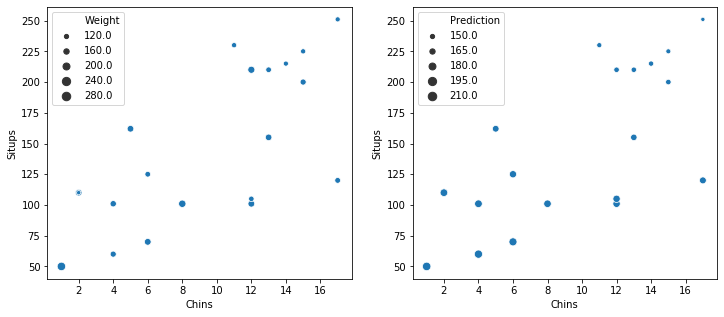

In [0]:
# Description of the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud
data = load_linnerud()
X = data.data[:, :2]  # only take first 2 features
y = data.target[:, 0]  # only take first target
print("Features name:", data.feature_names[:2])
print("Target name  :", data.target_names[0])

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


def plot_helper(chins, situps, weight, prediction):
  plt.figure(figsize=(12, 5))
  ax = plt.subplot(1, 2, 1)
  sns.scatterplot(x="Chins",
                  y="Situps",
                  size='Weight',
                  data=pd.DataFrame({
                      'Chins': chins,
                      'Situps': situps,
                      'Weight': weight
                  }),
                  ax=ax)
  ax = plt.subplot(1, 2, 2)
  sns.scatterplot(x="Chins",
                  y="Situps",
                  size='Prediction',
                  data=pd.DataFrame({
                      'Chins': chins,
                      'Situps': situps,
                      'Prediction': prediction
                  }),
                  ax=ax)

plot_helper(chins=X[:, 0], situps=X[:, 1], weight=y, prediction=y_pred)

In [0]:
# To intepret the model, we need to know the coefficients (a.k.a weights) and intercept (a.k.a bias)
print(model.coef_)
print(model.intercept_)

[-0.422218   -0.16976552]
207.29933192610912


In [0]:
# To evaluate the model we need regresion metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

print("Train Score:")
print(" R2:", r2_score(y_train, model.predict(X_train)))
print(" MSE:", r2_score(y_train, model.predict(X_train)))
print(" Explained variance:", r2_score(y_train, model.predict(X_train)))

print("Test Score:")
print(" R2:", r2_score(y_test, model.predict(X_test)))
print(" MSE:", r2_score(y_test, model.predict(X_test)))
print(" Explained variance:", r2_score(y_test, model.predict(X_test)))

(20, 2) (20,)
Train Score:
 R2: 0.331113571587889
 MSE: 0.331113571587889
 Explained variance: 0.331113571587889
Test Score:
 R2: -0.5146413252342756
 MSE: -0.5146413252342756
 Explained variance: -0.5146413252342756


### b) Second block
---
1. Unsupervised learning, no target variable is provided, model learns to uncover hidden structure within input data.
2. `KMean` is clustering algorithm. Intepreting a clustering algorithm involves associating meaningful explaination to the learned clusters. We could see a clear separable line between two clusters from the figure. However, the structure is only diversed by the number of "Situps", the model ignores the effect of "Chins". It also failed to discover any association with the weight.
3. Evaluating goodness of unsupervised model is **hard**, since we don't have ground truth. 

In general, we want "nice looking" clusters, two criterions are proposed:

* Maximizing inter-clusters variance: data points from different clusters must be different.
* Minimizing intra-clusters variance: data points within a cluster must be similar.

In `sklearn`, there are three metrics execute those ideas:

* `silhouette_score`: is calculated using the mean intra-cluster distance ($a$) and the mean nearest-cluster distance ($b$) for each sample. The Silhouette Coefficient for a sample is $\frac{(b - a)}{max(a, b)}$. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
* `calinski_harabasz_score`: The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion (bigger is better).
* `davies_bouldin_score`: The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score (smaller indicates better clusters).

Again, we need a **reference** to compare the score, since we have no groudtruth, splitting the data into training and testing wouldn't make difference. Instead, we compare `KMean` to another clustering algorithm, for simplicity, we choose random assignment algorithm in this case.

Run the added code block for checking the scores. In conclusion, `KMean` is significant better than random assignment for clustering our data.

Text(0, 0.5, 'Situps')

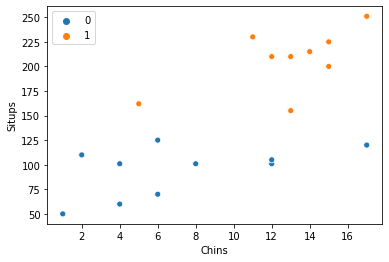

In [0]:
# We use the same dataset in a)
model = KMeans(2)
model.fit(X)
y_pred = model.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.xlabel('Chins')
plt.ylabel("Situps")

In [0]:
# metrics for evaluating clustering algorithm
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("KMean:")
print(" SIL:", silhouette_score(X, y_pred))
print(" CAL:", calinski_harabasz_score(X, y_pred))
print(" DAV:", davies_bouldin_score(X, y_pred))

# We create random assignment for comparison
y_pred_rand = np.random.randint(0, 2, size=X.shape[0])
print("Random assignment:")
print(" SIL:", silhouette_score(X, y_pred_rand))
print(" CAL:", calinski_harabasz_score(X, y_pred_rand))
print(" DAV:", davies_bouldin_score(X, y_pred_rand))

KMean:
 SIL: 0.681557768749259
 CAL: 77.98011297371376
 DAV: 0.3894228964342056
Random assignment:
 SIL: -0.031633894267610665
 CAL: 0.4140955432622517
 DAV: 6.061053600166452


# Question 2

### **a)** Filling in `TODO` of following code block to: _Create perceptron and use it to solve an AND classification problem_

Calculating the output of perceptron:

$y= \mathrm{F} \big( \sum_{i=0}^D w_i \cdot x_i \tag{1} \big)$

where $x_0=1$, $D$ is the number of input features, and $\mathrm{F}(.)$ is the threshold function, i.e.

$\mathrm{F}(x) =
  \begin{cases}
    1       & \quad \text{if } x \geq \mathrm{THRESHOLD}\\
    0  & \quad \text{if } x < \mathrm{THRESHOLD}
  \end{cases}$

The learning algorithm of perceptron following this update equation:

$w_i = w_i - \lambda \cdot \frac{1}{N} \sum_{j=0}^N(\bar{y}^{(j)} - y^{(j)}) x^{(j)}_i \tag{2}$

where $N$ is the total number of training examples, $\bar{y}$ is the predicted value of $y$ (the target variable), $(j)$ is the index of an example, and $\lambda$ is the learning rate.

For more detail [[1]][ref_1]

[ref_1]: https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a

In [0]:
# Number of training iterations
NUM_ITERATIONS = 25
# Threshold for 0/1 classification
THRESHOLD = 0.5
# Learning rate
LEARNING_RATE = 1e6

# NOTE: the bias is added here, and it is crucial for perceptron algorithm solving XOR problem
X = np.array(
    [[0, 0, 1],
     [0, 1, 1],
     [1, 0, 1],
     [1, 1, 1]]
)
# TODO: fill appropriate value for y
y = np.array([0, 0, 0, 1])

# Create perceptron weights (random weights)
weights = np.random.randn(3)

# Train perceptron
for iteration in range(NUM_ITERATIONS):
  # TODO: Calculate predictions with current weights (Equation (1))
  predictions = (np.dot(X, weights) >= THRESHOLD).astype(np.int)

  # Calculate accuracy (not needed for training, but to track the learning progress)
  accuracy = np.mean(predictions == y)
  # Print the accuracy
  print("Iteration %d: Acc %f \t %s" % (iteration, accuracy, str(predictions)))

  # TODO: Update weights according to update rule (Equation (2))
  weights = weights + LEARNING_RATE * np.mean((y - predictions)[:, None] * X, axis=0)

# Print weights for inspection
print(weights)

Iteration 0: Acc 0.750000 	 [0 0 0 0]
Iteration 1: Acc 0.250000 	 [1 1 1 1]
Iteration 2: Acc 0.750000 	 [0 0 0 0]
Iteration 3: Acc 1.000000 	 [0 0 0 1]
Iteration 4: Acc 1.000000 	 [0 0 0 1]
Iteration 5: Acc 1.000000 	 [0 0 0 1]
Iteration 6: Acc 1.000000 	 [0 0 0 1]
Iteration 7: Acc 1.000000 	 [0 0 0 1]
Iteration 8: Acc 1.000000 	 [0 0 0 1]
Iteration 9: Acc 1.000000 	 [0 0 0 1]
Iteration 10: Acc 1.000000 	 [0 0 0 1]
Iteration 11: Acc 1.000000 	 [0 0 0 1]
Iteration 12: Acc 1.000000 	 [0 0 0 1]
Iteration 13: Acc 1.000000 	 [0 0 0 1]
Iteration 14: Acc 1.000000 	 [0 0 0 1]
Iteration 15: Acc 1.000000 	 [0 0 0 1]
Iteration 16: Acc 1.000000 	 [0 0 0 1]
Iteration 17: Acc 1.000000 	 [0 0 0 1]
Iteration 18: Acc 1.000000 	 [0 0 0 1]
Iteration 19: Acc 1.000000 	 [0 0 0 1]
Iteration 20: Acc 1.000000 	 [0 0 0 1]
Iteration 21: Acc 1.000000 	 [0 0 0 1]
Iteration 22: Acc 1.000000 	 [0 0 0 1]
Iteration 23: Acc 1.000000 	 [0 0 0 1]
Iteration 24: Acc 1.000000 	 [0 0 0 1]
[ 250000.02080584  250000.67970345 

### b) In theory the perceptron algorithm should be able to solve the `AND` classification problem (i.e. give 100% accuracy). What is missing from above procedure? Could you make it work?

---
You need to add the bias to get 1.00 accuracy. Why?
You could imagine based on this figure:

* A perceptron without bias only rotates around the origin (0, 0), so it could never split the negative from positive examples.
* With bias, the line could be shifted.

![alt text](https://drive.google.com/uc?export=view&id=1e4RqBFU1-rOWIHqohpDzBVLk4h-muzAB)

# Question 3

Create multi-layer Adaline in `pytorch` and `tensorflow`

Approximation Error for Adaline is given by:

$E = \frac{1}{2} (\bar{y} - y)^2 \tag{3}$

where $\bar{y}$ is the predicted value of $y$ (the target variable)

Your tasks are divided into 2 steps:

* First filling in the `TODO`, create a multi-layer Adaline, and make the algorithm running
* Modifying the training procedure to get reasonable better results.

We will use the `linnerud` dataset from Question 1 as training data

---
the most important factor to consider is the "relative trend" of the errors during fitting.

* If error going up => you likely get too high learning rate, wrong cost function, wrong model (e.g. wrong output activation), wrong parameters to optimize, a mismatch between input and target data, and so on (this is not an exhaustive list).
* If error going down (your case) => it goes down but still too high, then the learning rate is too small, but if you increase the learning rate and things go wrong, then just increase the number of the epoch. The model might be too complicated which makes the fitting process slow and unstable. It could be over-penalization or regularization, or so on (again, not an exhaustive list).

The task of Question#3 would end here since you already get the correct trend (i.e. reducing the mean squared error). The whole point of the exercise is: "Deep learning is no magic bullet, simpler models do work better and more robust in most cases".

But ... if you still want to train a better deep network, then try this: 

1. Using Adam optimizer, 
2. set lr=0.1, 
3. training for 2000 iterations

Anyway, many of the techniques in Deep Learning heavily rely on personal experiences and intuition, that why they call it the "black-box" model.

Therefore, it could be great frustration when diagnosing the model sometimes.

In [0]:
X = data.data  # take all features
y = data.target[:, 0]  # only take first target
print("Features name:", data.feature_names)
print("Target name  :", data.target_names[0])

Features name: ['Chins', 'Situps', 'Jumps']
Target name  : Weight


### a) Multi-layer Adaline with `pytorch`

Epoch 0   Error:  16883.193
Epoch 1   Error:  16106.388
Epoch 2   Error:  15378.527
Epoch 3   Error:  14686.137
Epoch 4   Error:  14018.589
Epoch 5   Error:  13362.366
Epoch 6   Error:  12713.719
Epoch 7   Error:  12076.313
Epoch 8   Error:  11452.651
Epoch 9   Error:  10844.94
Epoch 10  Error:  10250.701
Epoch 11  Error:  9686.447
Epoch 12  Error:  9150.088
Epoch 13  Error:  8630.954
Epoch 14  Error:  8132.375
Epoch 15  Error:  7652.135
Epoch 16  Error:  7189.7383
Epoch 17  Error:  6748.305
Epoch 18  Error:  6329.699
Epoch 19  Error:  5936.0312
Epoch 20  Error:  5569.357
Epoch 21  Error:  5231.2173
Epoch 22  Error:  4922.5864
Epoch 23  Error:  4643.7607
Epoch 24  Error:  4394.36


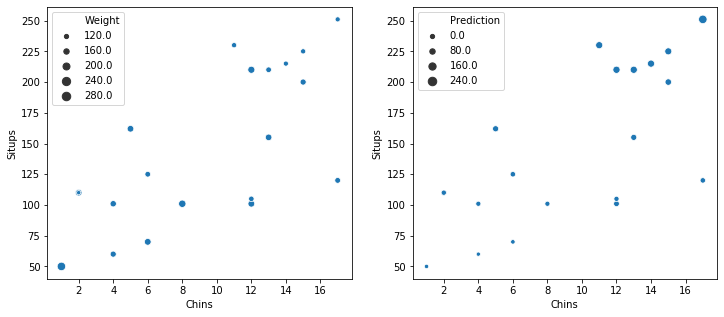

In [0]:
import torch

# convert data to pytorch tensor
X_pt = torch.from_numpy(X.astype('float32'))
y_pt = torch.from_numpy(y.astype('float32'))

# TODO: modify this single-layer Adaline into multi-layer adaline
network = torch.nn.Sequential(
    torch.nn.Linear(X.shape[1], 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),   
    torch.nn.Linear(32, 1)
)

def approximation_error(y_pred, y_true):
  # TODO: finish this function and return the approximation error of Adaline (Equation 3)
  return 1/2 * (y_pred - y_true)**2

# create Gradient descent optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=0.000001)

# iterate for 25 epochs
for i in range(25):
  # zero the parameter gradients
  optimizer.zero_grad()

  # forward + backward + optimize
  y_pred = network(X_pt)
  loss = approximation_error(y_pred, y_pt).mean()
  loss.backward()
  optimizer.step()
  
  # Print out error for monitoring
  print("Epoch %-3d" % i, "Error: ", loss.detach().numpy())

# Evaluate our final prediction
y_pred = network(X_pt).detach().numpy()
plot_helper(chins=X[:, 0], situps=X[:, 1], weight=y, prediction=y_pred.ravel())

### b) Multi-layer Adaline with `tensorflow`


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 0   Error:  17872.21
Epoch 1   Error:  2741.5437
Epoch 2   Error:  21198.846
Epoch 3   Error:  2704.3665
Epoch 4   Error:  8241.419
Epoch 5   Error:  9891.537
Epoch 6   Error:  9735.961
Epoch 7   Error:  8788.063
Epoch 8   Error:  7503.89
Epoch 9   Error:  5878.431
Epoch 10  Error:  4056.3853
Epoch 11  Error:  2771.6956
Epoch 12  Error:  3120.2021
Epoch 13  Error:  4790.294
Epoch 14  Error:  5296.583
Epoch 15  Error:  3971.0986
Epoch 16  Error:  2786.1318
Epoch 17  Error:  2725.7063
Epoch 18  Erro

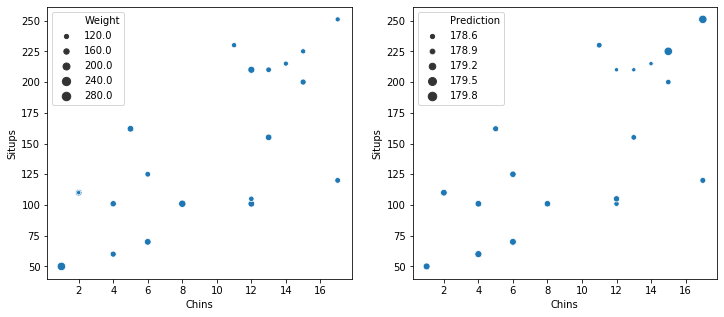

In [0]:
import tensorflow as tf
from tensorflow import keras


# TODO: modify this single-layer Adaline into multi-layer adaline
network = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1)
])

def approximation_error(y_pred, y_true):
  # TODO: finish this function and return the approximation error of Adaline (Equation 3)
  return 1/2 * (y_pred - y_true)**2

# create Gradient descent optimizer
optimizer = keras.optimizers.Adam(lr=0.1)

# iterate for 25 epochs
for i in range(2000):
  # forward
  with tf.GradientTape() as tape:
    y_pred = network(X)
    loss = tf.reduce_mean(approximation_error(y_pred, y))
  # backward
  gradients = tape.gradient(loss, network.trainable_variables)
  # optimize
  optimizer.apply_gradients(zip(gradients, network.trainable_variables))

  # Print out error for monitoring
  print("Epoch %-3d" % i, "Error: ", loss.numpy())

# Evaluate our final prediction
y_pred = network(X).numpy()
plot_helper(chins=X[:, 0], situps=X[:, 1], weight=y, prediction=y_pred.ravel())